In [1]:
# load all csv files in a directory and merge them into a single dataframe
import os
import pandas as pd

folder = "result"
files = os.listdir(folder)
df = pd.concat([pd.read_csv(os.path.join(folder, f)) for f in files])
print(df)

                target_name model_name feature_name  accuracy  \
0  PRIVACY_Risky row counts        svm           fw  0.741379   
0  PRIVACY_Risky row counts        xgb           fw  0.810345   
0  PRIVACY_Row memorization         lr          man  0.931034   
0  PRIVACY_Row memorization         rf          man  0.896552   
0  PRIVACY_Row memorization         dt          man  0.879310   
0  PRIVACY_Row memorization       base          man  0.576271   
0  PRIVACY_Risky row counts        svm          man  0.775862   
0  PRIVACY_Risky row counts         rf           fw  0.741379   
0  PRIVACY_Risky row counts         dt           fw  0.689655   
0  PRIVACY_Row memorization        xgb          man  0.931034   
0  PRIVACY_Row memorization         lr           fw  0.827586   
0  PRIVACY_Row memorization        svm           fw  0.879310   
0  PRIVACY_Row memorization        xgb           fw  0.948276   
0  PRIVACY_Row memorization         dt           fw  0.879310   
0  PRIVACY_Row memorizati

In [2]:
# save the merged dataframe to a new csv file
df.to_csv("merged.csv", index=False)

In [3]:
# drop the f1 column
df = df.drop(
    columns=["f1", "sensitivity", "specificity", "balanced_accuracy", "f2_score"]
)
# replace the "_" with space in column name
df.columns = df.columns.str.replace("_", " ")
df.columns = df.columns.str.replace("f05 score", "f0.5 score")

In [4]:
columns = df.columns[2:].tolist()
columns

['feature name', 'accuracy', 'f0.5 score']

In [5]:
data = df.melt(
    id_vars=["target name", "model name", "feature name"],
    value_vars=columns,
    var_name="score",
    value_name="value",
)

In [6]:
data

,target name,model name,feature name,score,value
0,PRIVACY_Risky row counts,svm,fw,accuracy,0.741379
1,PRIVACY_Risky row counts,xgb,fw,accuracy,0.810345
2,PRIVACY_Row memorization,lr,man,accuracy,0.931034
3,PRIVACY_Row memorization,rf,man,accuracy,0.896552
4,PRIVACY_Row memorization,dt,man,accuracy,0.879310
5,PRIVACY_Row memorization,base,man,accuracy,0.576271
6,PRIVACY_Risky row counts,svm,man,accuracy,0.775862
7,PRIVACY_Risky row counts,rf,fw,accuracy,0.741379
8,PRIVACY_Risky row counts,dt,fw,accuracy,0.689655
9,PRIVACY_Row memorization,xgb,man,accuracy,0.931034


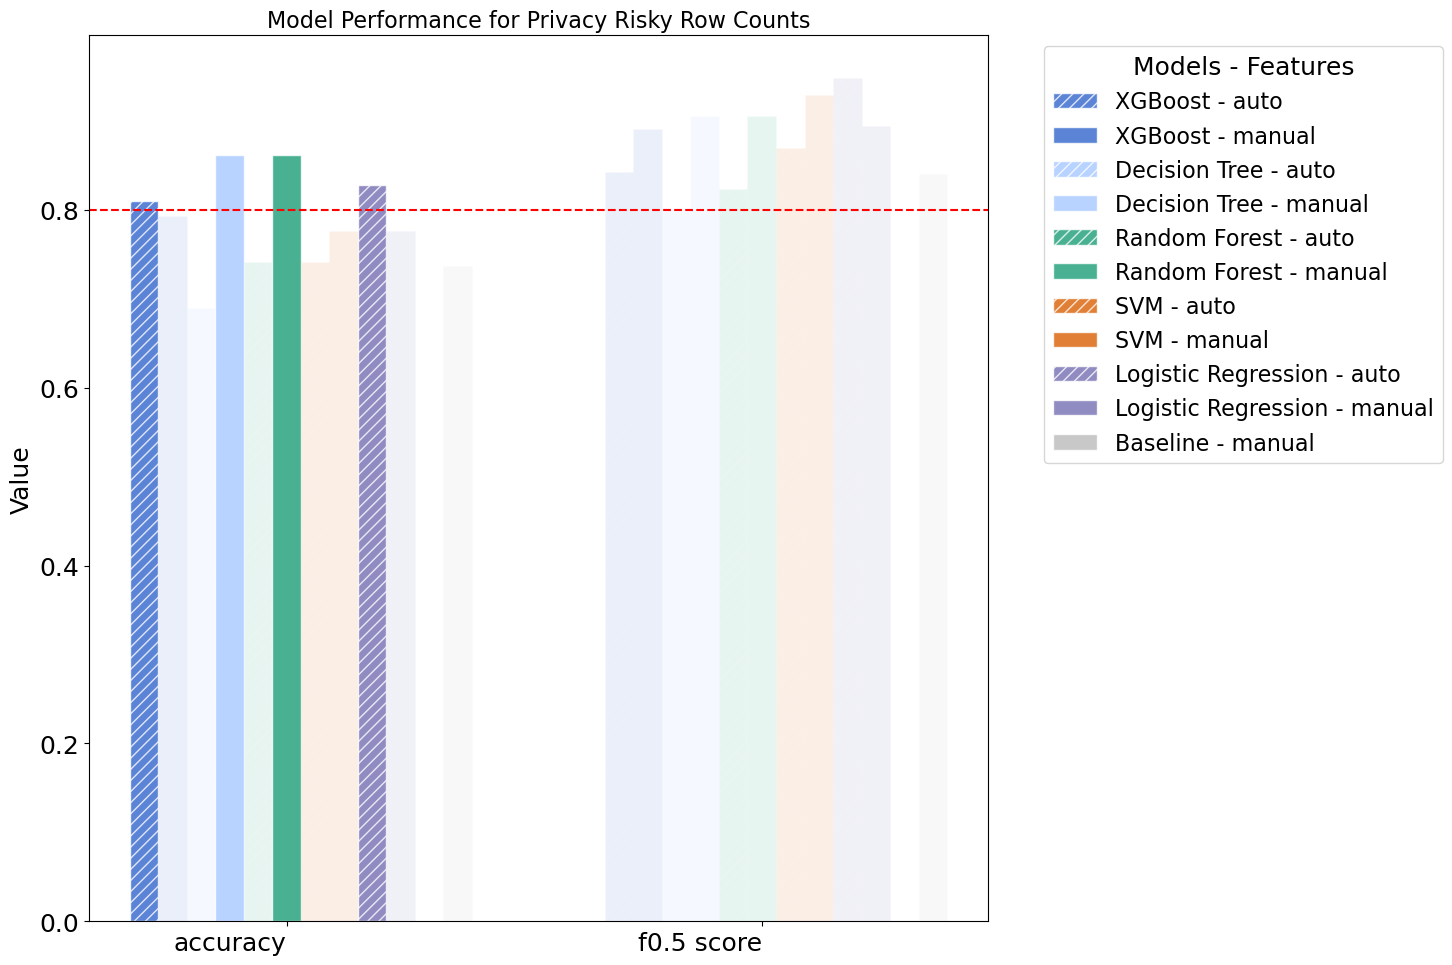

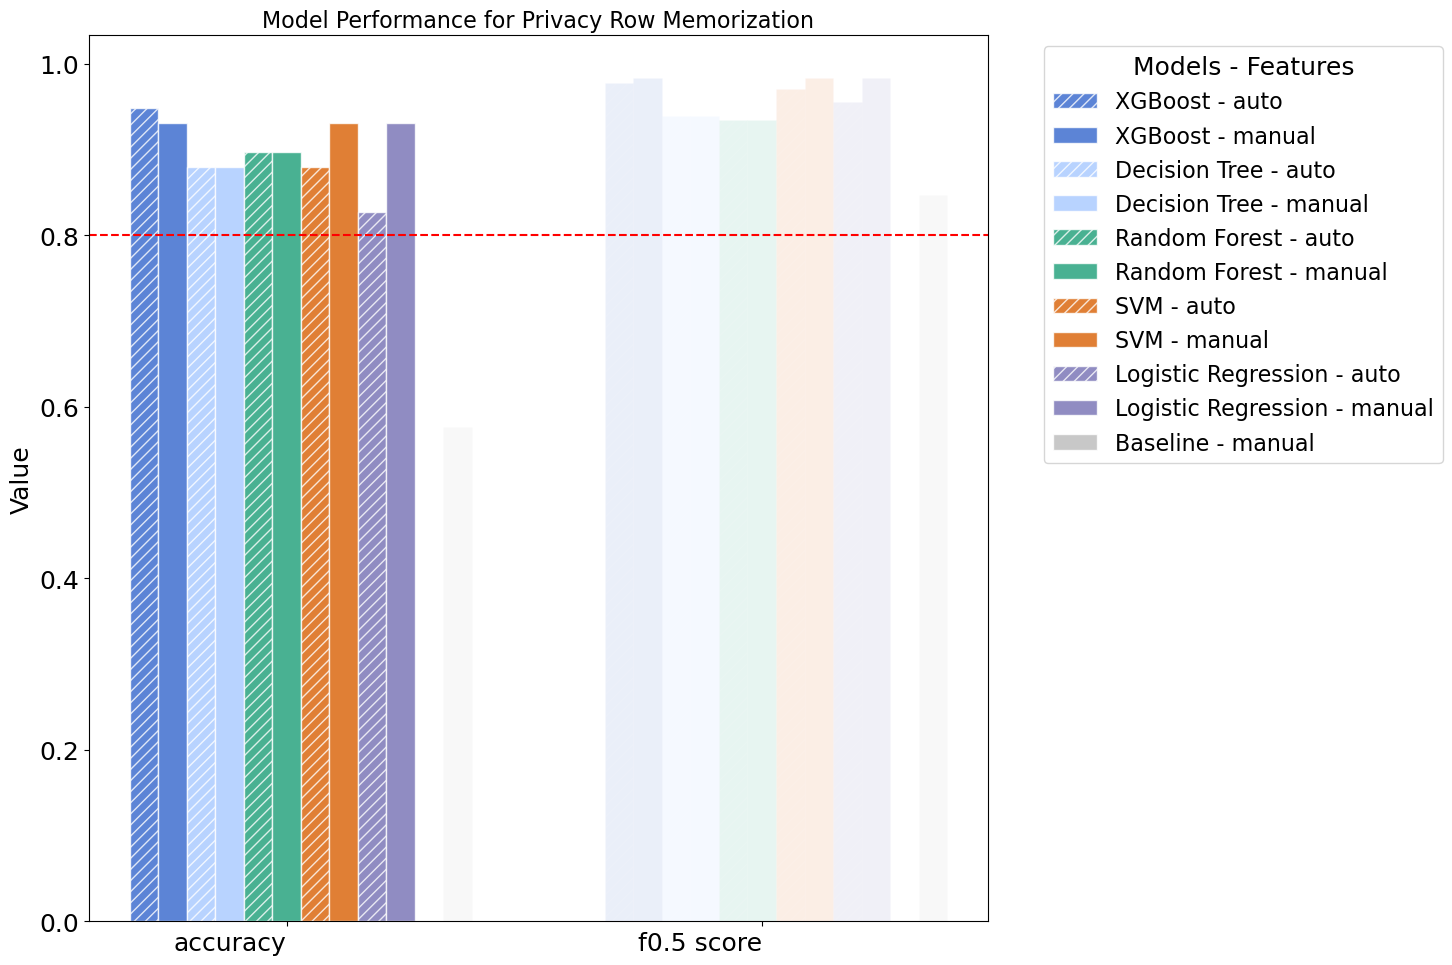

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

plt.rcParams.update(
    {
        "font.size": 18,  # Default font size
        "axes.titlesize": 16,  # Title font size
        "axes.labelsize": 18,  # X/Y label font size
        "xtick.labelsize": 18,  # X tick label font size
        "ytick.labelsize": 18,  # Y tick label font size
        "legend.fontsize": 16,  # Legend font size
        "figure.titlesize": 20,  # Figure title font size
    }
)

model_colors = {
    "xgb": "#3366cc",
    "dt": "#a6c8ff",
    "rf": "#1b9e77",
    "svm": "#d95f02",
    "lr": "#7570b3",
    "base": "#BBBBBB",  # Grey
}

feature_hatches = {
    "man": "",  # No hatch for 'man'
    "fw": "///",  # Diagonal lines hatch for 'fw'
    "": "",  # Default empty hatch
}

model_mapping = {
    "xgb": "XGBoost",
    "dt": "Decision Tree",
    "rf": "Random Forest",
    "svm": "SVM",
    "lr": "Logistic Regression",
    "base": "Baseline",
}
feature_mapping = {"fw": "auto", "man": "manual"}


def plot_model_performance_by_score(data):
    # Get unique targets
    targets = data["target name"].unique()

    # Create a subplot for each target
    for target in targets:
        # Filter data for current target
        target_data = data[data["target name"] == target]

        # Set up the plot
        plt.figure(figsize=(15, 10))

        # Get unique scores, models, and features
        scores = target_data["score"].unique()
        models = list(model_colors.keys())
        features = sorted(
            target_data["feature name"].unique()
        )  # Sort features consistently

        # Prepare for grouped bar chart
        bar_width = 0.06  # Reduce bar width to accommodate more bars
        index = np.arange(len(scores))

        # Prepare legend handles
        legend_handles = []
        legend_labels = []

        # Plot bars for each model and feature
        for j, model in enumerate(models):
            for k, score in enumerate(scores):
                for l, feature in enumerate(features):
                    specific_row = target_data[
                        (target_data["model name"] == model)
                        & (target_data["score"] == score)
                        & (target_data["feature name"] == feature)
                    ]

                    if not specific_row.empty:
                        # Get the value
                        value = specific_row["value"].values[0]

                        # Get accuracy for this specific model and feature
                        accuracy_row = target_data[
                            (target_data["model name"] == model)
                            & (target_data["score"] == "accuracy")
                            & (target_data["feature name"] == feature)
                        ]
                        accuracy = (
                            accuracy_row["value"].values[0]
                            if not accuracy_row.empty
                            else 0
                        )

                        # Dynamic alpha logic
                        if score == "f0.5 score":
                            alpha = 0.1
                        elif (score == "accuracy") & (accuracy >= 0.8):
                            alpha = 0.8
                        elif score == "f2 score":
                            alpha = 0.8 if accuracy < 0.8 else 0.1
                        else:
                            alpha = 0.1  # Default for other scores

                        # Determine hatch
                        feature_hatch = feature_hatches.get(feature, "")

                        # Plot the bar
                        bar = plt.bar(
                            index[k] + j * bar_width * len(features) + l * bar_width,
                            value,
                            bar_width,
                            color=model_colors[model],
                            edgecolor="white",
                            alpha=alpha,
                            hatch=feature_hatch,
                        )

                        # Add to legend handles if not already present
                        # legend_label = f"{model} - {feature}"
                        legend_label = f"{model_mapping.get(model, model)} - {feature_mapping.get(feature, feature)}"

                        if legend_label not in legend_labels:
                            # Create a custom patch for the legend with consistent 0.8 alpha
                            legend_patch = Patch(
                                facecolor=model_colors[model],
                                edgecolor="white",
                                label=legend_label,
                                alpha=0.8,
                                hatch=feature_hatch,
                            )
                            legend_handles.append(legend_patch)
                            legend_labels.append(legend_label)

        # Add a reference line
        plt.axhline(y=0.8, color="red", linestyle="--")

        # Customize the plot
        plt.title(f"Model Performance for {target.replace('_', ' ').title()}")
        plt.ylabel("Value")
        plt.xticks(
            index + bar_width * len(features) * (len(models) - 1) / 2,
            [f"{score}" for score in scores],
            ha="right",
        )

        # Add legend with model-feature combinations
        plt.legend(
            handles=legend_handles,
            bbox_to_anchor=(1.05, 1),
            loc="upper left",
            title="Models - Features",
            # prop=prop,
        )

        plt.tight_layout()
        # Save the plot
        plt.savefig(f"accur_{target}.png", bbox_inches="tight")
        plt.show()


# Call the function to create the plot
plot_model_performance_by_score(data)

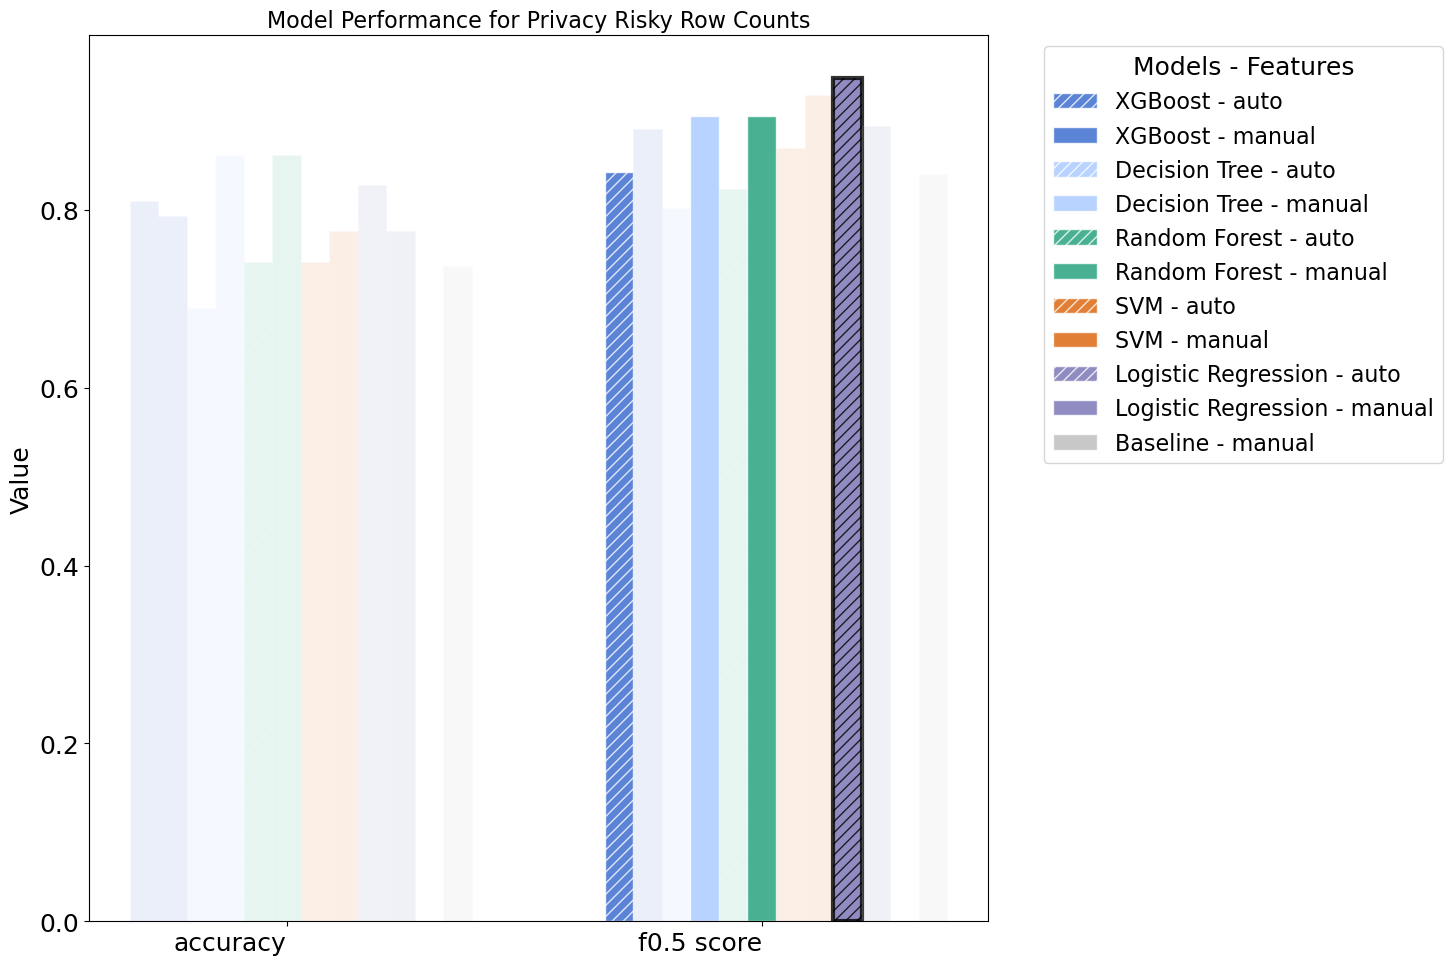

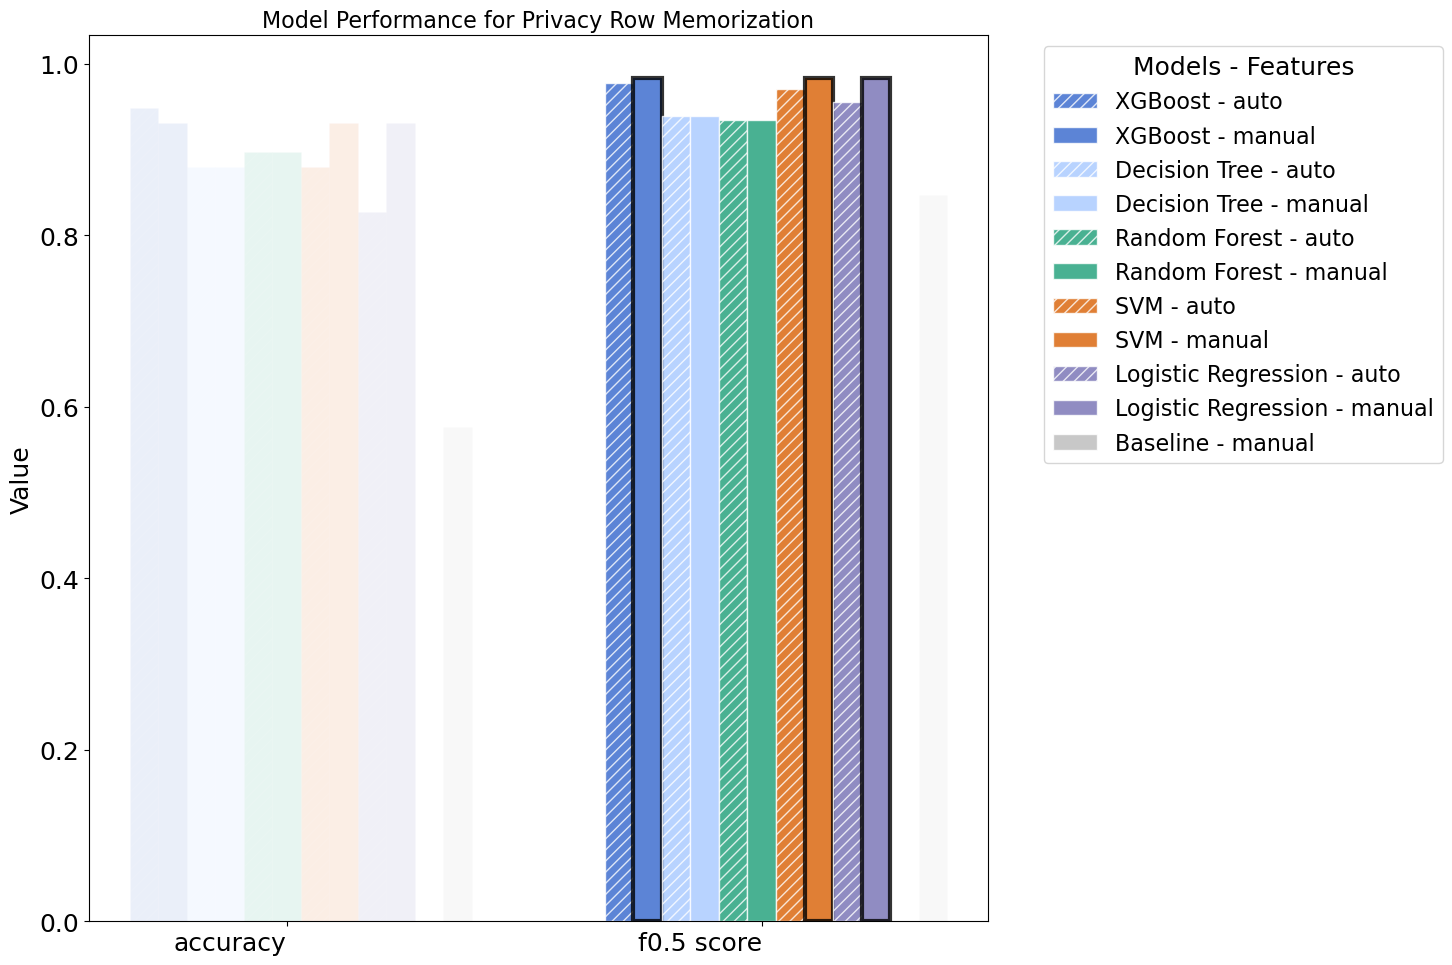

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

prop = {"size": 16}

model_colors = {
    "xgb": "#3366cc",
    "dt": "#a6c8ff",
    "rf": "#1b9e77",
    "svm": "#d95f02",
    "lr": "#7570b3",
    "base": "#BBBBBB",  # Grey
}

feature_hatches = {
    "man": "",  # No hatch for 'man'
    "fw": "///",  # Diagonal lines hatch for 'fw'
    "": "",  # Default empty hatch
}


def plot_model_performance_by_score(data):
    # Get unique targets
    targets = data["target name"].unique()

    # Create a subplot for each target
    for target in targets:
        # Filter data for current target
        target_data = data[data["target name"] == target]

        # Set up the plot
        plt.figure(figsize=(15, 10))

        # Get unique scores, models, and features
        scores = target_data["score"].unique()
        models = list(model_colors.keys())
        features = sorted(
            target_data["feature name"].unique()
        )  # Sort features consistently

        # Prepare for grouped bar chart
        bar_width = 0.06  # Reduce bar width to accommodate more bars
        index = np.arange(len(scores))

        # Prepare legend handles
        legend_handles = []
        legend_labels = []

        # Find the maximum f0.5 scores for each target
        f05_scores = target_data[target_data["score"] == "f0.5 score"]
        max_f05_value = f05_scores["value"].max()
        max_f05_rows = f05_scores[f05_scores["value"] == max_f05_value]

        # Create a set of (model, feature) tuples for highest f0.5 scores
        max_f05_keys = set(
            zip(max_f05_rows["model name"], max_f05_rows["feature name"])
        )

        # Plot bars for each model and feature
        for j, model in enumerate(models):
            for k, score in enumerate(scores):
                for l, feature in enumerate(features):
                    specific_row = target_data[
                        (target_data["model name"] == model)
                        & (target_data["score"] == score)
                        & (target_data["feature name"] == feature)
                    ]

                    if not specific_row.empty:
                        # Get the value
                        value = specific_row["value"].values[0]

                        # Get accuracy for this specific model and feature
                        accuracy_row = target_data[
                            (target_data["model name"] == model)
                            & (target_data["score"] == "accuracy")
                            & (target_data["feature name"] == feature)
                        ]
                        accuracy = (
                            accuracy_row["value"].values[0]
                            if not accuracy_row.empty
                            else 0
                        )

                        # Dynamic alpha logic
                        if score == "accuracy":
                            alpha = 0.1
                        elif score == "f0.5 score":
                            alpha = 0.8 if accuracy >= 0.8 else 0.1
                        elif score == "f2 score":
                            alpha = 0.8 if accuracy < 0.8 else 0.1
                        else:
                            alpha = 0.1  # Default for other scores

                        # Determine hatch
                        feature_hatch = feature_hatches.get(feature, "")

                        # Determine edge color (highlight max f0.5 score)
                        is_max_f05 = (
                            model,
                            feature,
                        ) in max_f05_keys and score == "f0.5 score"
                        edge_color = "black" if is_max_f05 else "white"
                        edge_width = 3 if is_max_f05 else 1

                        # Plot the bar
                        bar = plt.bar(
                            index[k] + j * bar_width * len(features) + l * bar_width,
                            value,
                            bar_width,
                            color=model_colors[model],
                            edgecolor=edge_color,
                            linewidth=edge_width,
                            alpha=alpha,
                            hatch=feature_hatch,
                        )

                        # Add to legend handles if not already present
                        # legend_label = f"{model} - {feature}"
                        legend_label = f"{model_mapping.get(model, model)} - {feature_mapping.get(feature, feature)}"
                        if legend_label not in legend_labels:
                            # Create a custom patch for the legend with consistent 0.8 alpha
                            legend_patch = Patch(
                                facecolor=model_colors[model],
                                edgecolor="white",
                                label=legend_label,
                                alpha=0.8,
                                hatch=feature_hatch,
                            )
                            legend_handles.append(legend_patch)
                            legend_labels.append(legend_label)

        # Add a reference line
        # plt.axhline(y=0.8, color="red", linestyle="--")

        # Customize the plot
        plt.title(f"Model Performance for {target.replace('_', ' ').title()}")
        plt.ylabel("Value")
        plt.xticks(
            index + bar_width * len(features) * (len(models) - 1) / 2,
            [f"{score}" for score in scores],
            ha="right",
        )

        # Add legend with model-feature combinations
        plt.legend(
            handles=legend_handles,
            bbox_to_anchor=(1.05, 1),
            loc="upper left",
            title="Models - Features",
            # prop=prop,
        )

        plt.tight_layout()
        # Save the plot
        plt.savefig(f"perf_{target}.png", bbox_inches="tight")
        plt.show()


# Call the function to create the plot
plot_model_performance_by_score(data)